In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from __future__ import print_function, absolute_import
import matplotlib.pyplot as plt
import numpy as np

## Trying out multiple trajectories with Russ's example code and Pendulum env

In [3]:
from multiple_traj_opt import (
    MultipleTrajOpt,
    initial_conditions_Russ,
    initial_conditions_grid,
    initial_conditions_random,
)
from nn_system.networks import *

###############################################
# Construct the inital MathematicalProgram
###############################################
num_trajectories = 1
num_samples      = 15
initial_conditions = (
    None,
#     "1",
#     "2",
#     "3",
)[0]
mto = MultipleTrajOpt("pendulum",
                      num_trajectories, 
                      num_samples,
                      ic_list=None)


###############################################
# Add a neural network!
###############################################
# kNetConstructor = lambda: FC(2)
kNetConstructor = lambda: FCBIG(2)
# kNetConstructor = lambda: MLPSMALL(2)
# kNetConstructor = lambda: MLP(2)
reg_type = "No"
# reg_type = "L1"
# reg_type = "L2"
mto.add_nn_params(kNetConstructor,
                  initialize_params = True, 
                  reg_type          = reg_type,
                  enable_constraint = True)

In [4]:
# Introduce a scaling factor in (0, 1] that can be used to shrink the initial
# conditions regions used for policy rollouts, so we can check an area SMALLER
# than that which was used for dircol calculations!
scaling = 0.5
mto.add_multiple_trajectories_visualization_callback(ic_list=None)

 1

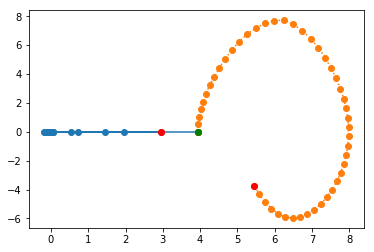

 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18

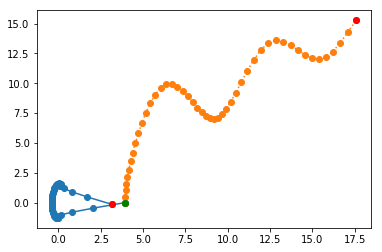

 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35

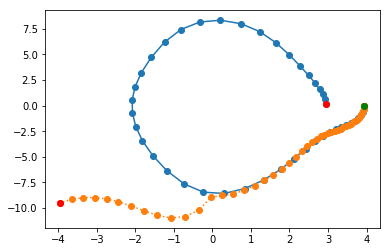

 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52

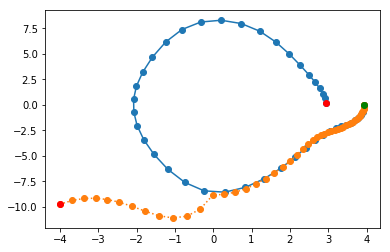

 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69

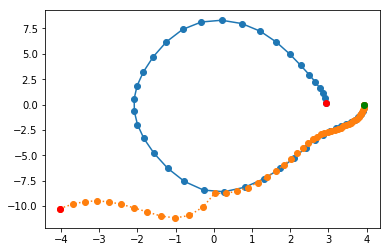

 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86

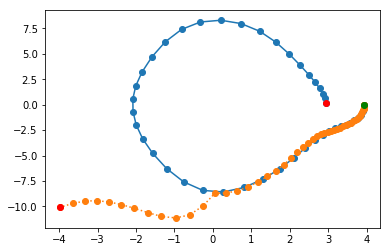

 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103

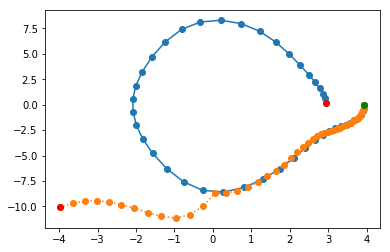

 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120

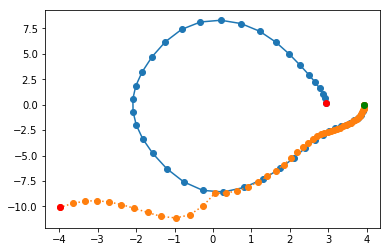

 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137

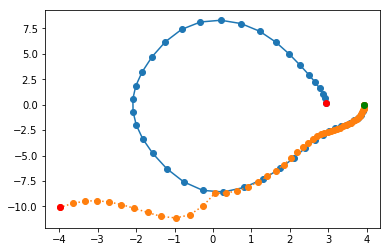

 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154

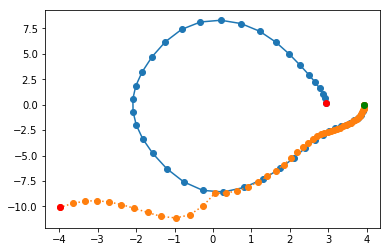

 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171

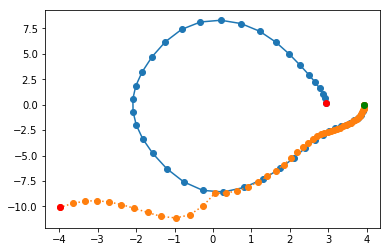

 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187SolutionResult.kUnknownError


In [5]:
result = mto.Solve()
print(result)

In [6]:
ti = 0    
mto.print_pi_divergence(ti)

u_val-Pi(x_val)= diff
(-4.25)-(-4.35)=  0.10
(-5.30)-(-5.20)= -0.10
(-2.39)-(-2.49)=  0.10
(-1.04)-(-0.94)= -0.10
(-0.45)-(-0.52)=  0.08
(-0.13)-(-0.23)=  0.10
( 0.15)-( 0.25)= -0.10
( 0.38)-( 0.41)= -0.03
( 0.63)-( 0.62)=  0.01
( 1.10)-( 1.20)= -0.10
( 1.60)-( 1.50)=  0.10
( 1.36)-( 1.35)=  0.01
( 0.49)-( 0.39)=  0.10
(-0.46)-(-0.36)= -0.10
(-0.62)-(-0.72)=  0.10


In [7]:
ti = 0
ani = mto.render_policy(ti)
from IPython.display import HTML
HTML(ani.to_html5_video())

/home/rverkuil/integration/integration/local/lib/python2.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/home/rverkuil/integration/integration/local/lib/python2.7/site-packages/scipy/interpolate/interpolate.py:610: RuntimeWarning: invalid value encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


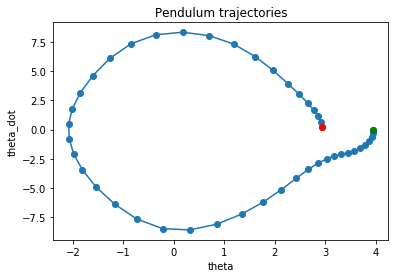

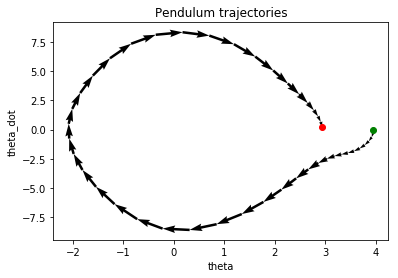

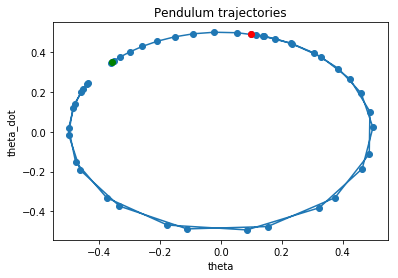

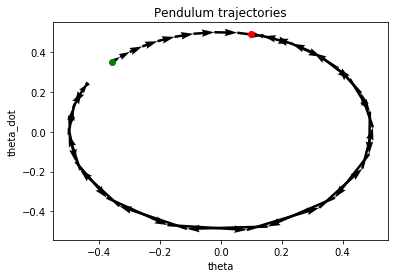

In [8]:
mto.plot_all_trajectories("state_scatter")
mto.plot_all_trajectories("state_quiver")
mto.plot_all_trajectories("tip_scatter")
mto.plot_all_trajectories("tip_quiver")

### Visualize the found trajectories

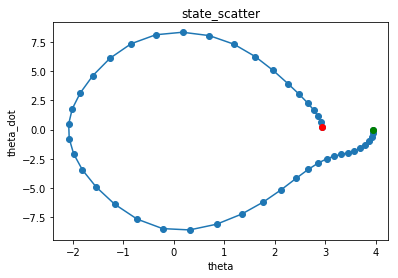

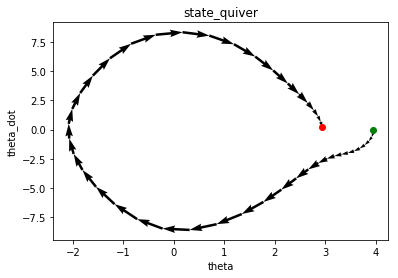

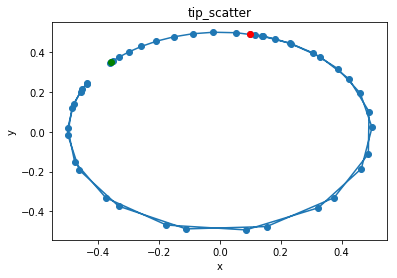

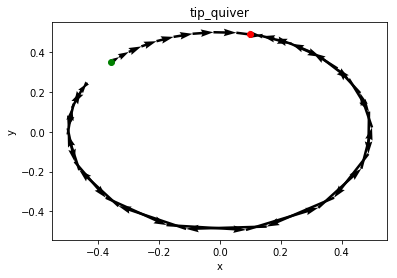

In [9]:
###### plt.figure()
# for ti in range(num_trajectories):
# for ti in [0]:

ti = 0
mto.plot_single_trajectory(ti, "state_scatter")
mto.plot_single_trajectory(ti, "state_quiver")
mto.plot_single_trajectory(ti, "tip_scatter")
mto.plot_single_trajectory(ti, "tip_quiver")

ani2 = mto.render_single_trajectory(ti)
HTML(ani2.to_html5_video())